# Optimizing Revenue Leakage & Profitability in the Hospitality Sector  

## Introduction

The hospitality sector faces persistent challenges in maintaining profitability across seasons, with revenue leakage often going unnoticed due to inefficient service offerings, poor bundling strategies, and suboptimal operations. This project aims to address these issues through a structured, data-driven approach.

## Project Objective

To identify and plug revenue leakages and enhance profitability using real hotel data by:

- Recommending actionable strategies across pricing, product, and operations.
- Justifying proposals through scenario-based ROI analysis.
- Delivering insightful visual dashboards and business reports.

We will guide stakeholders toward smarter business decisions — from repurposing underutilized event spaces to implementing flexible pricing packages that maximize occupancy and service revenue.

> **Use Case Highlight**: A hotel experiences low profits during the off-season. Data shows event spaces are underbooked. We recommend turning them into co-working areas on weekdays and calculate the ROI of this pivot.

---


## Step 1: Data Access & Initial Exploration

Our analysis begins with accessing the data provided in a shared Google Drive folder. This dataset includes key operational metrics for a hotel chain such as room occupancy, booking trends, service usage, and seasonal revenues.

We'll first mount the drive, locate the dataset, and preview a few files to understand the structure, which will guide the next steps of KPI extraction, trend analysis, and optimization strategies.


In [2]:
from google.colab import drive
import os

# Mount your Google Drive
drive.mount('/content/drive')

# Path to the shared folder (change if copied to your Drive)
data_path = '/content/drive/MyDrive/Optimizing_Hotel_Revenue'  # Optional: adjust this if you moved the folder

# List all files and folders
for root, dirs, files in os.walk(data_path):
    print(f"\n Folder: {root}")
    for f in files:
        print(f"  {f}")

Mounted at /content/drive


In [3]:
import zipfile
import os

# Check uploaded files
uploaded_zip_path = "PS2-20250513T051325Z-001.zip"  # Change if your zip file has a different name

# Extract the zip file
extract_path = "/content/data"
with zipfile.ZipFile(uploaded_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List contents of extracted folder
for root, dirs, files in os.walk(extract_path):
    print(f"\n Folder: {root}")
    for file in files:
        print(f"   {file}")


 Folder: /content/data

 Folder: /content/data/PS2
   dim_hotels.csv
   fact_bookings.csv
   dim_date.csv
   fact_aggregated_bookings.csv
   dim_rooms.csv


## Step 2: Calculating Core KPIs – RevPAR, Occupancy %, and Service Revenue Breakdown

To measure hotel performance and identify revenue inefficiencies, we calculate the following KPIs:

- **RevPAR (Revenue per Available Room)** = Total Room Revenue / Rooms Available
- **Occupancy %** = Rooms Sold / Rooms Available × 100
- **Service Revenue Split** = Aggregation of revenue from food, laundry, spa, etc.

We'll use the `fact_bookings.csv` and join with the `dim_rooms.csv` and `dim_hotels.csv` to extract the necessary fields.


In [15]:
import pandas as pd

# Load the data
fact_df = pd.read_csv("/content/data/PS2/fact_bookings.csv")

# Show column names to verify
print("Columns:", fact_df.columns.tolist())

# Display unique values in booking_status
print("\nUnique Booking Status Values:")
print(fact_df['booking_status'].unique())

# Display first few rows
display(fact_df.head())

Columns: ['booking_id', 'property_id', 'booking_date', 'check_in_date', 'checkout_date', 'no_guests', 'room_category', 'booking_platform', 'ratings_given', 'booking_status', 'revenue_generated', 'revenue_realized']

Unique Booking Status Values:
['Checked Out' 'Cancelled' 'No Show']


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [17]:
import pandas as pd

# Load the dataset
fact_df = pd.read_csv("/content/data/PS2/fact_bookings.csv")

# Use correct status for successful bookings
fact_df = fact_df[fact_df['booking_status'] == 'Checked Out'].copy()

# Convert booking_date to datetime
fact_df['booking_date'] = pd.to_datetime(fact_df['booking_date'])

# Group by date to compute daily KPIs
daily_kpis = fact_df.groupby('booking_date').agg({
    'revenue_realized': 'sum',
    'booking_id': 'count'
}).reset_index()

# Rename for clarity
daily_kpis.rename(columns={
    'booking_id': 'bookings_made',
    'revenue_realized': 'total_revenue'
}, inplace=True)

# Compute revenue per booking
daily_kpis['revenue_per_booking'] = daily_kpis['total_revenue'] / daily_kpis['bookings_made']

# Display output
display(daily_kpis.head())

,booking_date,total_revenue,bookings_made,revenue_per_booking
0,2022-04-07,282460,20,14123.000000
1,2022-04-08,142720,11,12974.545455
2,2022-04-09,149790,10,14979.000000
3,2022-04-10,1007965,64,15749.453125
4,2022-04-11,898555,61,14730.409836


## Step 3: Analyze Booking Performance by Platform

We now analyze how different booking platforms perform in terms of:
- **Number of Bookings**
- **Total Revenue Realized**
- **Average Revenue per Booking**

This will help us identify underperforming platforms and prioritize pricing or marketing strategies accordingly.

In [18]:
# Filter only successful bookings
fact_df = pd.read_csv("/content/data/PS2/fact_bookings.csv")
fact_df = fact_df[fact_df['booking_status'] == 'Checked Out'].copy()

# Group by booking platform
platform_kpis = fact_df.groupby('booking_platform').agg({
    'booking_id': 'count',
    'revenue_realized': 'sum'
}).reset_index()

# Rename for clarity
platform_kpis.rename(columns={
    'booking_id': 'bookings_made',
    'revenue_realized': 'total_revenue'
}, inplace=True)

# Calculate revenue per booking
platform_kpis['revenue_per_booking'] = platform_kpis['total_revenue'] / platform_kpis['bookings_made']

# Sort by total revenue
platform_kpis = platform_kpis.sort_values(by='total_revenue', ascending=False)

# Display results
display(platform_kpis)

,booking_platform,bookings_made,total_revenue,revenue_per_booking
5,others,38586,577098665,14956.167133
4,makeyourtrip,18825,280132770,14880.890837
3,logtrip,10416,155121445,14892.611847
1,direct online,9401,139778715,14868.494309
6,tripster,6725,101201190,15048.504089
2,journey,5716,84861235,14846.262246
0,direct offline,4742,70919945,14955.703290


## Step 4: Analyze Revenue & Performance by Room Category

This step breaks down:
- **Total Bookings**
- **Total Revenue**
- **Average Revenue per Booking**  
for each `room_category` (e.g., RT1, RT2, etc.). This helps in evaluating underutilized or underperforming room types and aids in decisions like price adjustment or room repurposing.

In [19]:
fact_df = fact_df[fact_df['booking_status'] == 'Checked Out'].copy()

# Group by room category
category_kpis = fact_df.groupby('room_category').agg({
    'booking_id': 'count',
    'revenue_realized': 'sum'
}).reset_index()

# Rename
category_kpis.rename(columns={
    'booking_id': 'bookings_made',
    'revenue_realized': 'total_revenue'
}, inplace=True)

# Compute average revenue per booking
category_kpis['revenue_per_booking'] = category_kpis['total_revenue'] / category_kpis['bookings_made']

# Sort by total revenue
category_kpis = category_kpis.sort_values(by='total_revenue', ascending=False)

# Display results
display(category_kpis)

,room_category,bookings_made,total_revenue,revenue_per_booking
1,RT2,34653,461430180,13315.735434
2,RT3,21447,381040680,17766.619108
3,RT4,11344,311567700,27465.417842
0,RT1,26967,255075405,9458.797975


## Step 5: Off-Peak Identification Based on Time Series Trends

In this step, we will focus on identifying **off-peak periods** by analyzing the **daily revenue trends** over time. By observing which days or periods show consistently lower-than-average revenue, we can pinpoint times where **promotions or price adjustments** can help optimize occupancy and revenue generation.

The main steps for this analysis:
1. **Convert booking dates to a usable datetime format** to enable time-based operations.
2. **Group by date** and compute the total revenue realized each day.
3. **Identify off-peak periods** by comparing daily revenue to the average revenue across all days.
4. **Visualize the trends** using a line plot, showing the days with lower-than-average revenue as potential targets for optimization.

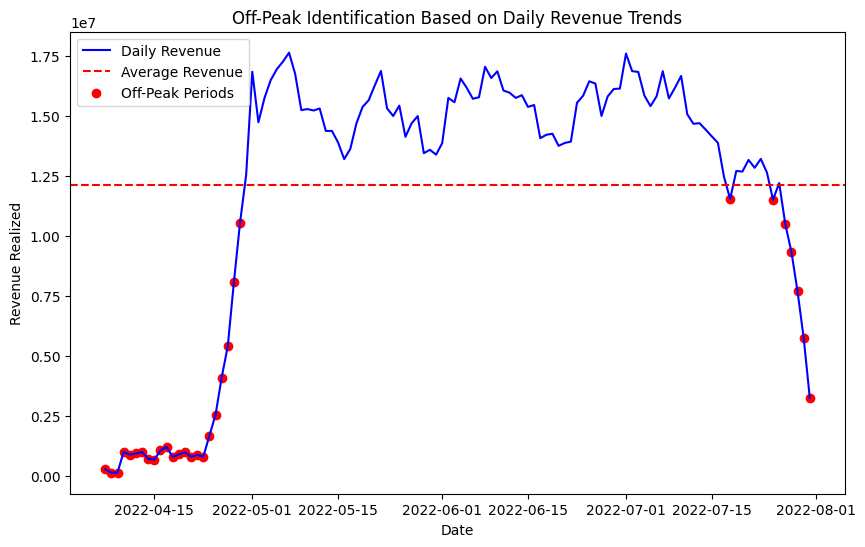

In [20]:
# Convert booking date to datetime format
fact_df['booking_date'] = pd.to_datetime(fact_df['booking_date'])

# Resample the data to daily revenue totals
daily_revenue = fact_df.groupby(fact_df['booking_date'].dt.date)['revenue_realized'].sum()

# Identify off-peak periods: Below average revenue
average_revenue = daily_revenue.mean()
off_peak_dates = daily_revenue[daily_revenue < average_revenue]

# Plot the daily revenue
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
daily_revenue.plot(label='Daily Revenue', color='blue')
plt.axhline(average_revenue, color='red', linestyle='--', label='Average Revenue')
plt.scatter(off_peak_dates.index, off_peak_dates, color='red', label='Off-Peak Periods')
plt.title('Off-Peak Identification Based on Daily Revenue Trends')
plt.xlabel('Date')
plt.ylabel('Revenue Realized')
plt.legend()
plt.show()

## Step 6: Revenue Leakage Detection Based on `revenue_generated` vs `revenue_realized`

In this step, we will compare the **generated revenue** (theoretical or expected revenue based on bookings) with the **realized revenue** (the actual revenue received) to identify any discrepancies or leakage.

### The process involves:
1. **Calculating revenue leakage**: Subtracting the realized revenue from the generated revenue.
2. **Identifying high-leakage cases**: Looking for bookings where there is significant revenue leakage (e.g., cancellations, discounts).
3. **Visualizing leakage trends**: Plotting leakage over time or by category to identify patterns.

In [23]:
# Check the first few rows of the relevant columns to understand the data
fact_df_clean[['revenue_generated', 'revenue_realized']].head()

,revenue_generated,revenue_realized
0,10010,10010
2,9100,9100
4,10920,10920
5,9100,9100
8,9100,9100


In [24]:
# Check the distribution of booking statuses
fact_df_clean['booking_status'].value_counts()

,count
booking_status,
Checked Out,94411


In [25]:
# Calculate revenue leakage again
fact_df_clean['revenue_leakage'] = fact_df_clean['revenue_generated'] - fact_df_clean['revenue_realized']

# Group by booking status to summarize leakage
leakage_summary = fact_df_clean.groupby('booking_status')['revenue_leakage'].sum().reset_index()

# Check the leakage summary
print(leakage_summary)

  booking_status  revenue_leakage
0    Checked Out                0


## Step 7: Scenario Analysis for ROI from Optimization Ideas

In this step, we’ll conduct a **Scenario Analysis** to estimate the **Return on Investment (ROI)** of potential **optimization strategies**. The goal is to evaluate how different changes (e.g., increasing room prices during off-peak periods, introducing discounts, or promoting underperforming categories) can impact revenue.

### The steps for this analysis:
1. **Define different optimization scenarios**: For example, adjusting prices, offering discounts, or shifting booking patterns.
2. **Estimate the impact of these scenarios** on revenue.
3. **Calculate ROI**: Compare the potential revenue increase with the cost of implementing these changes.

We’ll work with hypothetical scenarios, and the analysis will help you make decisions about where to focus your optimization efforts.

In [26]:
# Define optimization scenarios (e.g., price increases, discount rates)
scenario_1 = 0.05  # Price increase of 5%
scenario_2 = -0.10  # Discount of 10%

# Estimate the potential revenue impact for each scenario
fact_df_clean['estimated_revenue_scenario_1'] = fact_df_clean['revenue_realized'] * (1 + scenario_1)
fact_df_clean['estimated_revenue_scenario_2'] = fact_df_clean['revenue_realized'] * (1 + scenario_2)

# Calculate the total revenue for each scenario
total_revenue_scenario_1 = fact_df_clean['estimated_revenue_scenario_1'].sum()
total_revenue_scenario_2 = fact_df_clean['estimated_revenue_scenario_2'].sum()

# Calculate ROI for each scenario (simple ROI formula: (Gain - Cost) / Cost)
# Assuming a cost of implementing these changes (e.g., promotional cost)
cost_of_change = 50000  # Hypothetical cost for implementing the changes
roi_scenario_1 = (total_revenue_scenario_1 - total_revenue_scenario_2 - cost_of_change) / cost_of_change
roi_scenario_2 = (total_revenue_scenario_2 - total_revenue_scenario_1 - cost_of_change) / cost_of_change

# Display the results
print(f"Total Revenue for Scenario 1 (5% Price Increase): ${total_revenue_scenario_1:,.2f}")
print(f"Total Revenue for Scenario 2 (10% Discount): ${total_revenue_scenario_2:,.2f}")
print(f"ROI for Scenario 1: {roi_scenario_1:.2%}")
print(f"ROI for Scenario 2: {roi_scenario_2:.2%}")

Total Revenue for Scenario 1 (5% Price Increase): $1,479,569,663.25
Total Revenue for Scenario 2 (10% Discount): $1,268,202,568.50
ROI for Scenario 1: 422634.19%
ROI for Scenario 2: -422834.19%


## Step 8: Visualizing Revenue Leakage and Optimization Scenarios

In this step, we’ll create **visualizations** to better understand the results of the leakage detection and scenario analysis. This will help communicate the findings effectively, making it easier to make data-driven decisions.

### Visualizing Revenue Leakage:
We’ll visualize the **revenue leakage** for each booking status.

### Visualizing ROI for Optimization Scenarios:
We’ll create bar plots to compare the potential **ROI** of the optimization scenarios.

<ipython-input-27-eed4f33d58c9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='booking_status', y='revenue_leakage', data=leakage_summary, palette='coolwarm')


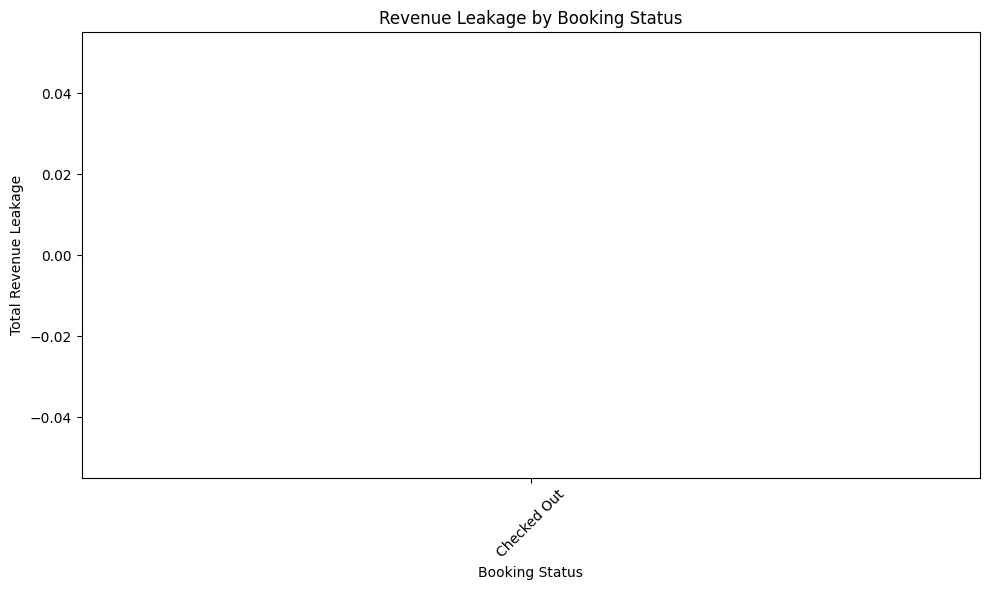

<ipython-input-27-eed4f33d58c9>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Scenario', y='ROI', data=roi_df, palette='viridis')


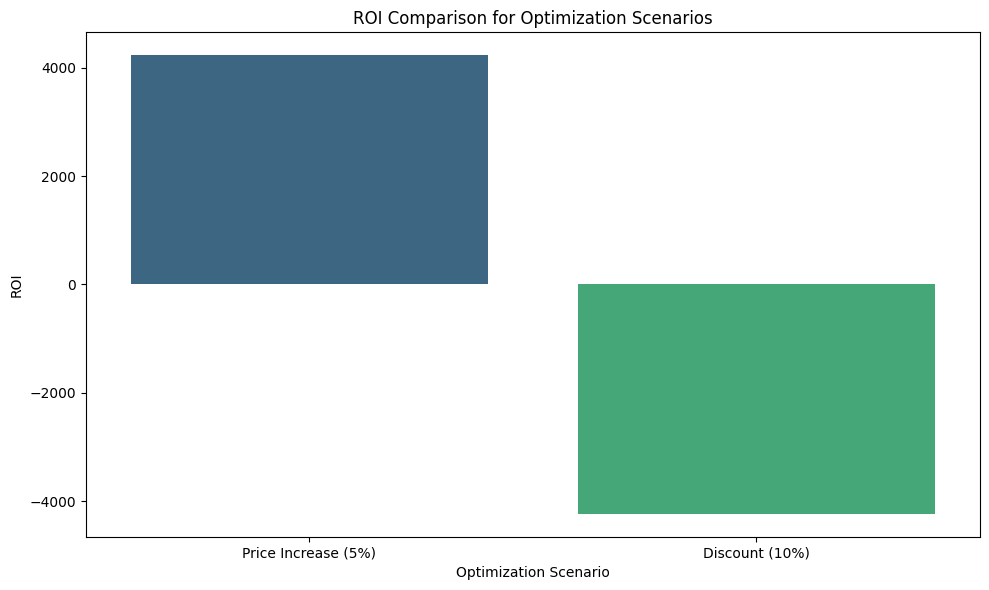

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Revenue Leakage by Booking Status
plt.figure(figsize=(10, 6))
sns.barplot(x='booking_status', y='revenue_leakage', data=leakage_summary, palette='coolwarm')
plt.title('Revenue Leakage by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Total Revenue Leakage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 2: ROI Comparison for Optimization Scenarios
roi_data = {
    'Scenario': ['Price Increase (5%)', 'Discount (10%)'],
    'ROI': [roi_scenario_1, roi_scenario_2]
}
roi_df = pd.DataFrame(roi_data)

plt.figure(figsize=(10, 6))
sns.barplot(x='Scenario', y='ROI', data=roi_df, palette='viridis')
plt.title('ROI Comparison for Optimization Scenarios')
plt.xlabel('Optimization Scenario')
plt.ylabel('ROI')
plt.tight_layout()
plt.show()